# Content
* PCA
* T-SNE
* SVD

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Lets import a data file to work in it

In [4]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
to_drop=['RowNumber','CustomerId','Surname']
data=data.drop(to_drop,axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data_str=[data.dtypes]
data_str

[CreditScore          int64
 Geography           object
 Gender              object
 Age                  int64
 Tenure               int64
 Balance            float64
 NumOfProducts        int64
 HasCrCard            int64
 IsActiveMember       int64
 EstimatedSalary    float64
 Exited               int64
 dtype: object]

In [9]:
int_col=data.columns[data.dtypes=='int64']
int_col

Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [10]:
num_cols=['CreditScore','Age','Balance','EstimatedSalary']
num_data=data[num_cols]
num_data.head()

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10


In [11]:
num_data.describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


In [12]:
num_data.corr()

,CreditScore,Age,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.006268,-0.001384
Age,-0.003965,1.000000,0.028308,-0.007201
Balance,0.006268,0.028308,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.012797,1.000000


<AxesSubplot:>

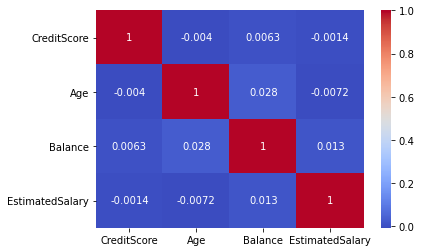

In [13]:
sns.heatmap(num_data.corr(),cmap='coolwarm',annot=True)

## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler.fit(num_data)

StandardScaler()

In [16]:
scaled_data = scaler.transform(num_data)
scaled_data[:5,]

array([[-0.32622142,  0.29351742, -1.22584767,  0.02188649],
       [-0.44003595,  0.19816383,  0.11735002,  0.21653375],
       [-1.53679418,  0.29351742,  1.33305335,  0.2406869 ],
       [ 0.50152063,  0.00745665, -1.22584767, -0.10891792],
       [ 2.06388377,  0.38887101,  0.7857279 , -0.36527578]])

In [ ]:
#print(np.mean(num_data.CreditScore))
#print(np.std(num_data.CreditScore))
#print((num_data.CreditScore-np.mean(num_data.CreditScore))/np.std(num_data.CreditScore))

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [17]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=4)

In [41]:
pca.fit(scaled_data)

PCA(n_components=2)

Now we can transform this data to its first 3 principal components.

In [42]:
x_pca = pca.transform(scaled_data)
x_pca[:10,]

array([[-0.71429383,  0.40336324],
       [ 0.2244099 , -0.00334451],
       [ 1.11248355,  0.10391767],
       [-0.87544425,  0.17140125],
       [ 0.89732842, -0.22784483],
       [ 0.88645145, -0.62481578],
       [-0.32664068,  1.49705776],
       [-0.29532674, -0.00665495],
       [ 0.92876835,  0.81193948],
       [-0.13193558, -0.30292524]])

In [43]:
scaled_data.shape

(10000, 4)

In [44]:
x_pca.shape

(10000, 2)

We've reduced 6 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

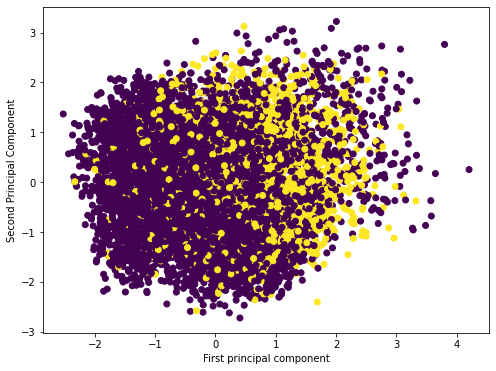

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data['Exited'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [46]:
pcs = ['pc1','pc2','pc3','pc4']

In [47]:
pca_data=pd.DataFrame(x_pca, columns=pcs)
#pca_data.columns=['PCA1','PCA2']
pca_data.head()

,pc1,pc2
0,-0.714294,0.403363
1,0.224410,-0.003345
2,1.112484,0.103918
3,-0.875444,0.171401
4,0.897328,-0.227845


In [48]:
pca_data.corr()

,pc1,pc2
pc1,1.000000e+00,1.152749e-15
pc2,1.152749e-15,1.000000e+00


<AxesSubplot:>

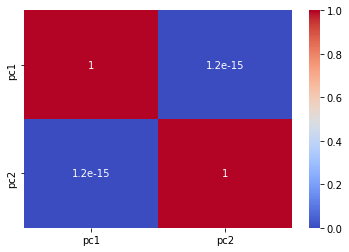

In [49]:
sns.heatmap(pca_data.corr(),cmap='coolwarm',annot=True)

In [50]:
# Use this data inplace of numeric data
print(num_cols)
new_data=data.drop(num_cols,axis=1).join(pca_data)
new_data.head()

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,pc1,pc2
0,France,Female,2,1,1,1,1,-0.714294,0.403363
1,Spain,Female,1,1,0,1,0,0.224410,-0.003345
2,France,Female,8,3,1,0,1,1.112484,0.103918
3,France,Female,1,2,0,0,0,-0.875444,0.171401
4,Spain,Female,2,1,1,1,0,0.897328,-0.227845


percentage_var_explained: [5.41184038e+01 4.58814649e+01 1.29726449e-04 1.52616602e-06]
cum_var_explained: [ 54.11840383  99.99986875  99.99999847 100.        ]


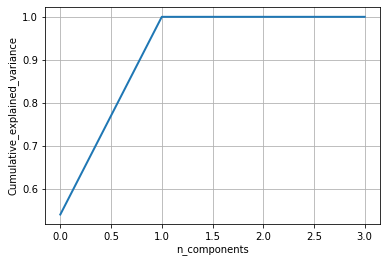

In [39]:
pca.n_components = 4
pca_data = pca.fit_transform(num_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
print('percentage_var_explained:',percentage_var_explained*100)
cum_var_explained = np.cumsum(percentage_var_explained)
print('cum_var_explained:',cum_var_explained*100)

plt.figure(1, figsize=(6, 4))
#plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### TSNE

In [51]:
data = pd.read_csv('Churn_Modelling.csv')
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [52]:
to_drop=['RowNumber','CustomerId','Surname']
data.drop(to_drop,axis=1,inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
num_cols=['CreditScore','Age','Balance','EstimatedSalary']
num_data=data[num_cols]
num_data.head()

,CreditScore,Age,Balance,EstimatedSalary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10


In [54]:
from sklearn.manifold import TSNE

In [55]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(num_data)
print(standardized_data.shape)
print(standardized_data[:5,])


(10000, 4)
[[-0.32622142  0.29351742 -1.22584767  0.02188649]
 [-0.44003595  0.19816383  0.11735002  0.21653375]
 [-1.53679418  0.29351742  1.33305335  0.2406869 ]
 [ 0.50152063  0.00745665 -1.22584767 -0.10891792]
 [ 2.06388377  0.38887101  0.7857279  -0.36527578]]


In [56]:
labels = data['Exited']

################################## REFER 001PCATSNE ##################
model = TSNE(n_components=2, random_state=10, n_iter=300,perplexity=30) #perplexity=50,  n_iter=5000


tsne_data = model.fit_transform(standardized_data)


tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

In [57]:
tsne_df.head()

,Dim_1,Dim_2,label
0,4.803198,5.787027,1.0
1,0.797791,-2.309254,0.0
2,4.438409,-2.295223,1.0
3,0.936657,6.525157,0.0
4,-7.676355,-6.573680,0.0


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


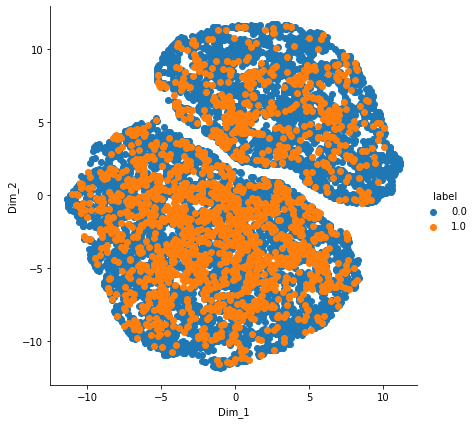

In [58]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [59]:
new_df=data[['Balance','Age','Exited']]
new_df.head()

,Balance,Age,Exited
0,0.00,42,1
1,83807.86,41,0
2,159660.80,42,1
3,0.00,39,0
4,125510.82,43,0


C:\Users\MSI\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


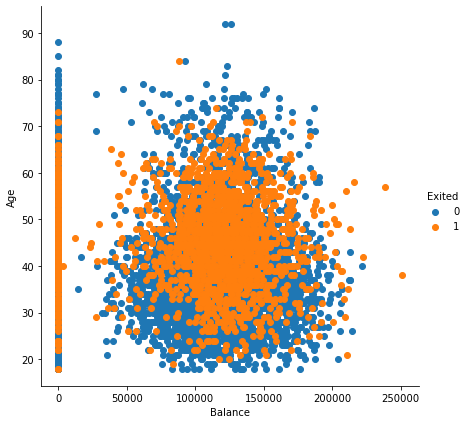

In [60]:
sns.FacetGrid(new_df, hue="Exited", size=6).map(plt.scatter, 'Balance', 'Age').add_legend()
plt.show()

### Singular Value Decomposition (SVD)

In [ ]:
import numpy as np
from numpy import array
from sklearn.decomposition import TruncatedSVD
# define array
A = array([[1,2,3,4,5,6,7,8,9,10],
           [11,12,13,14,15,16,17,18,19,20],
           [21,22,23,24,25,26,27,28,29,30]])
print(A)
# svd
svd = TruncatedSVD(n_components=2)
svd.fit(A)
result = svd.transform(A)
print(result)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix

In [ ]:
X = sparse_random_matrix(100, 100, density=0.1, random_state=42)
print(X)

In [ ]:
svd = TruncatedSVD(n_components=5) #, n_iter=7, random_state=42)
svd.fit(X)

In [ ]:
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())  
print(svd.singular_values_)

In [ ]:
cum_var_explained = np.cumsum(svd.explained_variance_ratio_/svd.explained_variance_ratio_.sum())
print('cum_var_explained:',cum_var_explained*100)

In [ ]:
df = svd.transform(X)
df=pd.DataFrame(df)
df.head()

### Correlation

In [61]:
num_data.corr()

,CreditScore,Age,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.006268,-0.001384
Age,-0.003965,1.000000,0.028308,-0.007201
Balance,0.006268,0.028308,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.012797,1.000000


<AxesSubplot:>

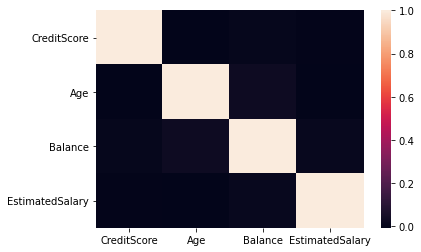

In [62]:
sns.heatmap(num_data.corr())

<AxesSubplot:>

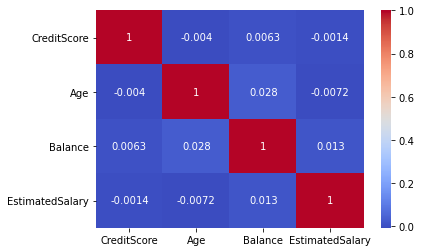

In [63]:
sns.heatmap(num_data.corr(),cmap='coolwarm',annot=True)

In [64]:
num_data.corr()['CreditScore']>0.5

CreditScore         True
Age                False
Balance            False
EstimatedSalary    False
Name: CreditScore, dtype: bool

### Low Variance

In [65]:
num_data.std()

CreditScore           96.653299
Age                   10.487806
Balance            62397.405202
EstimatedSalary    57510.492818
dtype: float64

In [66]:
num_cols=['CreditScore','Age','Balance','EstimatedSalary','Exited']
num_data=data[num_cols]
num_data.head()

,CreditScore,Age,Balance,EstimatedSalary,Exited
0,619,42,0.00,101348.88,1
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,1
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0


In [67]:
by_Exited=num_data.groupby("Exited")

In [69]:
by_Exited.std()

,CreditScore,Age,Balance,EstimatedSalary
Exited,,,,
0,95.653837,10.125363,62848.040701,57405.586966
1,100.321503,9.761562,58360.794816,57912.418071
